Fradulent Activities Detection
------------------------------
Goal
----
Being able to identify fradulent activities on the E-commerce websites using machine learning. The goal is to build a model that predicts the probability of whether the first transcation of a new user is fradulent or not.
Dataset
-------
Information about the user first transaction on the site, and you have to make your classification (fraud/not fraud).

Tasks
-----
1. For each user, determine the country based on the numeric IP address (IpAddress_to_Country.csv)
2. Build a model to predict whether an activity is fradulent or not. Explain how different assumptions about the cost of false positive v.s. false negative would impact the model.
3. Explain your model to your supervisor clearly, from a user perspective. What are the characteristics of users who are more likely to be classified as a fraud?
4. Suppose that this model can be used live to predict in real time. From a product perspective, how would you use it?

Task1:
------

In [1]:
import pandas
import pandasql
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
cwd = os.getcwd()
print cwd


/Users/yuchengtsai/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


/Users/yuchengtsai/Documents/Fraud/Fraud


In [2]:
df1 = pandas.read_csv('/Users/yuchengtsai/Documents/Fraud/Fraud_Data.csv')
df2 = pandas.read_csv('/Users/yuchengtsai/Documents/Fraud/IpAddress_to_Country.csv')

In [3]:
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
df2.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
df3 = df1.sample(n = 20000) # random sample 

In [6]:
import time
t1 = time.time()
q = """
SELECT *
FROM df3
INNER JOIN df2
ON df2.lower_bound_ip_address <=df3.ip_address AND df2.upper_bound_ip_address >= df3.ip_address
"""
t2 = time.time()
print "time:\t",t2-t1
sol1 = pandasql.sqldf(q.lower(),locals())
sol1.head()

time:	0.000147819519043


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,257250,2015-02-28 12:54:08,2015-05-12 11:59:10,58,EHUNROLLXDBPG,SEO,Safari,F,26,2.501883e+09,0,2.501837e+09,2501902335,United States
1,293039,2015-01-06 16:33:20,2015-01-06 16:33:21,62,XWRXEZURUYHBE,SEO,Chrome,M,24,5.413026e+08,1,5.368709e+08,553648127,United States
2,224811,2015-01-14 11:17:15,2015-04-02 10:17:24,49,LTFYJTEBNDZCM,Direct,Chrome,F,23,2.343927e+09,0,2.343895e+09,2343960575,United States
3,101640,2015-02-15 20:53:36,2015-05-28 20:05:51,47,RMUUHXTOAYOOM,Direct,Chrome,M,32,4.614025e+08,0,4.613734e+08,461504511,China
4,119891,2015-07-01 23:35:27,2015-08-25 13:12:10,51,WFOJTEFBWSEDA,SEO,IE,M,45,2.856090e+09,0,2.856059e+09,2856124415,Switzerland


In [7]:
print "number of N/A:"
print sol1.isnull().sum()
print "number of joint data:\t",len(sol1)

number of N/A:
user_id                   0
signup_time               0
purchase_time             0
purchase_value            0
device_id                 0
source                    0
browser                   0
sex                       0
age                       0
ip_address                0
class                     0
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
number of joint data:	16984


In [8]:
# count number of user from each country
q = """
SELECT country, COUNT(country)
FROM sol1
GROUP BY country;
"""
sol2 = pandasql.sqldf(q.lower(),locals())
sol2.head()

,country,count(country)
0,Afghanistan,1
1,Albania,1
2,Algeria,19
3,Angola,3
4,Argentina,81


Sort the country and rename the remaining of the top 50 "Others"

/Users/yuchengtsai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


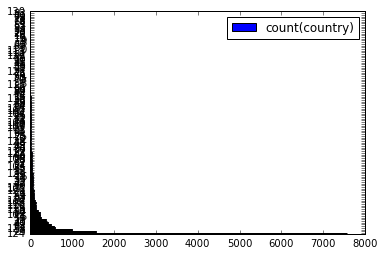

In [9]:

df_sort_country= sol2.sort_values('count(country)',ascending=False)
df_sort_country.plot(kind='barh')
df_sort_country.country[50:len(df_sort_country)]='Others'

Below I am trying to keep the top 50 coutries and set the remaining as others

In [10]:
df_sort_country.columns=['top_country','count(top_country)']
df_sort_country.head(n=55)

,top_country,count(top_country)
124,United States,7573
23,China,1576
58,Japan,987
123,United Kingdom,586
62,Korea Republic of,577
42,Germany,486
40,France,432
21,Canada,397
17,Brazil,363
56,Italy,253


Task3: Create New Features
-------------------
**Time difference between sign-up time and purcase time**

In [11]:
#signup_DT = sol1['signup_time']
#purchase_DT = sol1['purchase_time']
sol1['delta'] = sol1['purchase_time'].astype('datetime64[ns]')-sol1['signup_time'].astype('datetime64[ns]')
#convert value in "delta" to seconds
sol1['delta']=sol1['delta'].apply(lambda x: x.total_seconds())


#signup_p= signup_DT.str.split(' ') #parse the date time
#sol1['signup_date'] = signup_p.str[0]
#sol1['sign_t'] = signup_p.str[1]
sol1.head()

#purchase_p = purchase_DT.str.split(' ')


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta
0,257250,2015-02-28 12:54:08,2015-05-12 11:59:10,58,EHUNROLLXDBPG,SEO,Safari,F,26,2.501883e+09,0,2.501837e+09,2501902335,United States,6303902.0
1,293039,2015-01-06 16:33:20,2015-01-06 16:33:21,62,XWRXEZURUYHBE,SEO,Chrome,M,24,5.413026e+08,1,5.368709e+08,553648127,United States,1.0
2,224811,2015-01-14 11:17:15,2015-04-02 10:17:24,49,LTFYJTEBNDZCM,Direct,Chrome,F,23,2.343927e+09,0,2.343895e+09,2343960575,United States,6735609.0
3,101640,2015-02-15 20:53:36,2015-05-28 20:05:51,47,RMUUHXTOAYOOM,Direct,Chrome,M,32,4.614025e+08,0,4.613734e+08,461504511,China,8809935.0
4,119891,2015-07-01 23:35:27,2015-08-25 13:12:10,51,WFOJTEFBWSEDA,SEO,IE,M,45,2.856090e+09,0,2.856059e+09,2856124415,Switzerland,4714603.0


In [12]:
print len(sol1['delta'])

16984


** How many users in an unique device **

In [13]:
# check for each device id how many different users had it
q="""
SELECT device_id, COUNT(user_id)
FROM sol1
GROUP BY device_id
"""
sol3 = pandasql.sqldf(q.lower(),locals())
sol3.head()
print "how many unique device_id\t", len(sol3)
print "maximum users per unique device_id\t",sol3['count(user_id)'].max()


how many unique device_id	16405
maximum users per unique device_id	7


For each individual device, there are maximum 3 different users on it, which is suspecious and will be an important features to look at.

In [14]:
sort = sol3.sort_values('count(user_id)',ascending=False)
sort.head()

,device_id,count(user_id)
7896,MQSTSDMCMCTNK,7
13715,VRYLIRAQJIIIE,6
15847,ZBUATXTANUZNB,6
10957,RLDRWAKWUDJMK,6
12492,TTXUVRWUEHCQX,5


Now, let me rename the count of a unique device_id to "share_device"

In [15]:
df_share_device = sol3
df_share_device.rename(columns={'count(user_id)':'share_device'},inplace=True)
df_share_device.head()

,device_id,share_device
0,AABOOVEJUXMKC,1
1,AABOYHXAZBTLZ,1
2,AACIHTWABTEMZ,1
3,AAGMOPZROWHED,1
4,AAGVFMPDJZFNA,1


**How many Frauds in the data**

In [16]:
# check number of fraud, class =1
q ="""
SELECT class, COUNT(class)
FROM sol1
GROUP BY class
"""

sol4 = pandasql.sqldf(q.lower(),locals())
sol4.head()
print "how many frauds in the sampling data\t",sol4['count(class)'].min()

how many frauds in the sampling data	1655


In [17]:
print 'number of total users in the dataset:\t', len(df1)
print 'number of total users randomly sampled:\t', len(df3)
print 'fraction of frauds among all users:\t', (float(sol4['count(class)'].min()))/float(len(sol1))


number of total users in the dataset:	151112
number of total users randomly sampled:	20000
fraction of frauds among all users:	0.0974446537918


**How many users in an unique IP address**

In [18]:
# check for each ip address and how many users have it?
q ="""
SELECT ip_address, count(user_id)
FROM sol1
GROUP BY ip_address
"""
sol5 = pandasql.sqldf(q.lower(),locals())
sol5.head()

print "max users for a unique ip address\t",sol5['count(user_id)'].max()


max users for a unique ip address	7


In [19]:
sort = sol5.sort_values('count(user_id)',ascending=False)
sort.head()

,ip_address,count(user_id)
12995,2.966276e+09,7
5322,1.213105e+09,6
8919,2.028749e+09,6
7598,1.704054e+09,6
5624,1.279271e+09,5


In [20]:
df_share_ip=sol5
df_share_ip.rename(columns={'count(user_id)':'share_ip'},inplace=True)
df_share_ip.head()

,ip_address,share_ip
0,1.709773e+07,1
1,1.712443e+07,1
2,1.735739e+07,1
3,1.749586e+07,1
4,1.756028e+07,1


I am going to join the "share_device", and "share_ip", 'sort_country' to the existing so1 DataFrame because these are important features for further analysis

In [21]:
sol1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta
0,257250,2015-02-28 12:54:08,2015-05-12 11:59:10,58,EHUNROLLXDBPG,SEO,Safari,F,26,2.501883e+09,0,2.501837e+09,2501902335,United States,6303902.0
1,293039,2015-01-06 16:33:20,2015-01-06 16:33:21,62,XWRXEZURUYHBE,SEO,Chrome,M,24,5.413026e+08,1,5.368709e+08,553648127,United States,1.0
2,224811,2015-01-14 11:17:15,2015-04-02 10:17:24,49,LTFYJTEBNDZCM,Direct,Chrome,F,23,2.343927e+09,0,2.343895e+09,2343960575,United States,6735609.0
3,101640,2015-02-15 20:53:36,2015-05-28 20:05:51,47,RMUUHXTOAYOOM,Direct,Chrome,M,32,4.614025e+08,0,4.613734e+08,461504511,China,8809935.0
4,119891,2015-07-01 23:35:27,2015-08-25 13:12:10,51,WFOJTEFBWSEDA,SEO,IE,M,45,2.856090e+09,0,2.856059e+09,2856124415,Switzerland,4714603.0


In [22]:
# inner join device_id 
q="""
SELECT *
FROM sol1
INNER JOIN  df_share_device
ON df_share_device.device_id = sol1.device_id
"""
sol1 = pandasql.sqldf(q.lower(),locals())
sol1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta,device_id,share_device
0,257250,2015-02-28 12:54:08,2015-05-12 11:59:10,58,EHUNROLLXDBPG,SEO,Safari,F,26,2.501883e+09,0,2.501837e+09,2501902335,United States,6303902.0,EHUNROLLXDBPG,1
1,293039,2015-01-06 16:33:20,2015-01-06 16:33:21,62,XWRXEZURUYHBE,SEO,Chrome,M,24,5.413026e+08,1,5.368709e+08,553648127,United States,1.0,XWRXEZURUYHBE,5
2,224811,2015-01-14 11:17:15,2015-04-02 10:17:24,49,LTFYJTEBNDZCM,Direct,Chrome,F,23,2.343927e+09,0,2.343895e+09,2343960575,United States,6735609.0,LTFYJTEBNDZCM,1
3,101640,2015-02-15 20:53:36,2015-05-28 20:05:51,47,RMUUHXTOAYOOM,Direct,Chrome,M,32,4.614025e+08,0,4.613734e+08,461504511,China,8809935.0,RMUUHXTOAYOOM,1
4,119891,2015-07-01 23:35:27,2015-08-25 13:12:10,51,WFOJTEFBWSEDA,SEO,IE,M,45,2.856090e+09,0,2.856059e+09,2856124415,Switzerland,4714603.0,WFOJTEFBWSEDA,1


In [23]:
# inner join ip_address
q="""
SELECT *
FROM sol1
INNER JOIN df_share_ip
ON df_share_ip.ip_address = sol1.ip_address
"""
sol1=pandasql.sqldf(q.lower(),locals())
sol1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta,share_device,ip_address,share_ip
0,257250,2015-02-28 12:54:08,2015-05-12 11:59:10,58,EHUNROLLXDBPG,SEO,Safari,F,26,2.501883e+09,0,2.501837e+09,2501902335,United States,6303902.0,1,2.501883e+09,1
1,293039,2015-01-06 16:33:20,2015-01-06 16:33:21,62,XWRXEZURUYHBE,SEO,Chrome,M,24,5.413026e+08,1,5.368709e+08,553648127,United States,1.0,5,5.413026e+08,5
2,224811,2015-01-14 11:17:15,2015-04-02 10:17:24,49,LTFYJTEBNDZCM,Direct,Chrome,F,23,2.343927e+09,0,2.343895e+09,2343960575,United States,6735609.0,1,2.343927e+09,1
3,101640,2015-02-15 20:53:36,2015-05-28 20:05:51,47,RMUUHXTOAYOOM,Direct,Chrome,M,32,4.614025e+08,0,4.613734e+08,461504511,China,8809935.0,1,4.614025e+08,1
4,119891,2015-07-01 23:35:27,2015-08-25 13:12:10,51,WFOJTEFBWSEDA,SEO,IE,M,45,2.856090e+09,0,2.856059e+09,2856124415,Switzerland,4714603.0,1,2.856090e+09,1


In [24]:
# inner join country
q="""
SELECT *
FROM sol1
INNER JOIN sol2
ON sol2.country = sol1.country
"""
sol1=pandasql.sqldf(q.lower(),locals())
sol1.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta,share_device,share_ip,country,count(country)
0,257250,2015-02-28 12:54:08,2015-05-12 11:59:10,58,EHUNROLLXDBPG,SEO,Safari,F,26,2.501883e+09,0,2.501837e+09,2501902335,United States,6303902.0,1,1,United States,7573
1,293039,2015-01-06 16:33:20,2015-01-06 16:33:21,62,XWRXEZURUYHBE,SEO,Chrome,M,24,5.413026e+08,1,5.368709e+08,553648127,United States,1.0,5,5,United States,7573
2,224811,2015-01-14 11:17:15,2015-04-02 10:17:24,49,LTFYJTEBNDZCM,Direct,Chrome,F,23,2.343927e+09,0,2.343895e+09,2343960575,United States,6735609.0,1,1,United States,7573
3,101640,2015-02-15 20:53:36,2015-05-28 20:05:51,47,RMUUHXTOAYOOM,Direct,Chrome,M,32,4.614025e+08,0,4.613734e+08,461504511,China,8809935.0,1,1,China,1576
4,119891,2015-07-01 23:35:27,2015-08-25 13:12:10,51,WFOJTEFBWSEDA,SEO,IE,M,45,2.856090e+09,0,2.856059e+09,2856124415,Switzerland,4714603.0,1,1,Switzerland,112


In [25]:
sol1.columns.values[-1] = 'count'
df_sort_country.columns.values[-1]='count'

In [26]:
# inner join sort_country
q="""
SELECT*
FROM sol1
INNER JOIN df_sort_country
ON df_sort_country.count = sol1.count
"""
sol1=pandasql.sqldf(q.lower(),locals())
sol1.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta,share_device,share_ip,count,top_country,count
0,257250,2015-02-28 12:54:08,2015-05-12 11:59:10,58,EHUNROLLXDBPG,SEO,Safari,F,26,2.501883e+09,0,2.501837e+09,2501902335,United States,6303902.0,1,1,7573,United States,7573
1,293039,2015-01-06 16:33:20,2015-01-06 16:33:21,62,XWRXEZURUYHBE,SEO,Chrome,M,24,5.413026e+08,1,5.368709e+08,553648127,United States,1.0,5,5,7573,United States,7573
2,224811,2015-01-14 11:17:15,2015-04-02 10:17:24,49,LTFYJTEBNDZCM,Direct,Chrome,F,23,2.343927e+09,0,2.343895e+09,2343960575,United States,6735609.0,1,1,7573,United States,7573
3,101640,2015-02-15 20:53:36,2015-05-28 20:05:51,47,RMUUHXTOAYOOM,Direct,Chrome,M,32,4.614025e+08,0,4.613734e+08,461504511,China,8809935.0,1,1,1576,China,1576
4,119891,2015-07-01 23:35:27,2015-08-25 13:12:10,51,WFOJTEFBWSEDA,SEO,IE,M,45,2.856090e+09,0,2.856059e+09,2856124415,Switzerland,4714603.0,1,1,112,Switzerland,112


In [27]:
# check whether top_country contains "Others"
#sol1[sol1['top_country']=='Others'].index.tolist()


In [28]:
print len(sol1)

19366


Task4: Feature Selection
-----------------
The features that I will use to compare againt the class are:
- share_device
- share_ip
- time_float
- source_Direct
- browser_Chrome
- browser_IE
- Source_SEO
- sex_M
- sex_F

To determine which features are more important, I will use the following algorithms:
- Phi correlation for nominal (class) vs. nominal (source,browser,sex) data http://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html
- Point-Biserial correlation for nominal (class) vs. quantitative data (purchase_value,age,time_diff) REF: https://www.andrews.edu/~calkins/math/edrm611/edrm13.htm

In addtion, I need to make categorical data for ['source','browser', 'sex', 'country'] using dummy variables.

**Categorial data**

In [29]:
sol1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta,share_device,share_ip,count,top_country,count
0,257250,2015-02-28 12:54:08,2015-05-12 11:59:10,58,EHUNROLLXDBPG,SEO,Safari,F,26,2.501883e+09,0,2.501837e+09,2501902335,United States,6303902.0,1,1,7573,United States,7573
1,293039,2015-01-06 16:33:20,2015-01-06 16:33:21,62,XWRXEZURUYHBE,SEO,Chrome,M,24,5.413026e+08,1,5.368709e+08,553648127,United States,1.0,5,5,7573,United States,7573
2,224811,2015-01-14 11:17:15,2015-04-02 10:17:24,49,LTFYJTEBNDZCM,Direct,Chrome,F,23,2.343927e+09,0,2.343895e+09,2343960575,United States,6735609.0,1,1,7573,United States,7573
3,101640,2015-02-15 20:53:36,2015-05-28 20:05:51,47,RMUUHXTOAYOOM,Direct,Chrome,M,32,4.614025e+08,0,4.613734e+08,461504511,China,8809935.0,1,1,1576,China,1576
4,119891,2015-07-01 23:35:27,2015-08-25 13:12:10,51,WFOJTEFBWSEDA,SEO,IE,M,45,2.856090e+09,0,2.856059e+09,2856124415,Switzerland,4714603.0,1,1,112,Switzerland,112


In [30]:
dummies_sex = pandas.get_dummies(sol1['sex'],prefix='sex')
dummies_source = pandas.get_dummies(sol1['source'],prefix='source')
dummies_browser = pandas.get_dummies(sol1['browser'],prefix='browser')
dummies_country = pandas.get_dummies(sol1['top_country'],prefix='country')
sol6 =pandas.concat([sol1,dummies_sex,dummies_source,dummies_browser,dummies_country],axis=1)
df_cleaned=sol6.drop(['sex','source','browser','user_id','signup_time','purchase_time','device_id','ip_address',
                 'lower_bound_ip_address','upper_bound_ip_address','country','top_country','count'],axis=1)
df_cleaned.head()

,purchase_value,age,class,delta,share_device,share_ip,sex_F,sex_M,source_Ads,source_Direct,...,country_Sweden,country_Switzerland,country_Taiwan; Republic of China (ROC),country_Thailand,country_Turkey,country_Ukraine,country_United Kingdom,country_United States,country_Venezuela,country_Viet Nam
0,58,26,0,6303902.0,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,62,24,1,1.0,5,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,23,0,6735609.0,1,1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,32,0,8809935.0,1,1,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51,45,0,4714603.0,1,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#check whether top_country contains "Others"
'country_Others' in df_cleaned.columns 

True

**Feature selection**

In [33]:
from scipy.stats import pointbiserialr
from sklearn.metrics import matthews_corrcoef

param=[]
correlation=[]
abs_corr=[]
columns = df_cleaned.columns.values
for column in columns:
    if len(df_cleaned[column].unique())<=2:
        corr =matthews_corrcoef(df_cleaned['class'],df_cleaned[column]) #phi coefficient
    else:
        corr = pointbiserialr(df_cleaned['class'],df_cleaned[column])[0]
    param.append(column)
    correlation.append(corr)
    abs_corr.append(abs(corr))

#Create dataFrame for visualization
param_df = pandas.DataFrame({'correlation':correlation,'parameter':param,'abs_corr':abs_corr})
#sort by absolute correlation
param_df = param_df.sort_values('abs_corr',ascending=False)
#set parameter name as index
param_df = param_df.set_index(['parameter'])
param_df.head(n=20)

,abs_corr,correlation
parameter,,
class,1.000000,1.000000
share_ip,0.537449,0.537449
share_device,0.531531,0.531531
delta,0.269895,-0.269895
browser_IE,0.024469,-0.024469
country_Sweden,0.021535,0.021535
country_Mexico,0.021535,0.021535
browser_FireFox,0.018699,0.018699
country_Others,0.017773,-0.017773


**The absolute correlation coefficient indicates that share_ip, share_device, delta (time difference between purchase time and signup time) are top three important features.**

Features visualization
----------------------


In [34]:
#scale_delta
from sklearn.preprocessing import MinMaxScaler
scaler_delta=MinMaxScaler(feature_range=(0,100),copy=True)
delta_scaled=scaler_delta.fit_transform(df_cleaned['delta'].astype(float))
df_cleaned['scaled_delta'] = pandas.Series(delta_scaled)
df_cleaned.describe()

/Users/yuchengtsai/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/yuchengtsai/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/yuchengtsai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,purchase_value,age,class,delta,share_device,share_ip,sex_F,sex_M,source_Ads,source_Direct,...,country_Switzerland,country_Taiwan; Republic of China (ROC),country_Thailand,country_Turkey,country_Ukraine,country_United Kingdom,country_United States,country_Venezuela,country_Viet Nam,scaled_delta
count,19366.000000,19366.000000,19366.000000,1.936600e+04,19366.000000,19366.000000,19366.000000,19366.000000,19366.000000,19366.000000,...,19366.000000,19366.000000,19366.000000,19366.000000,19366.000000,19366.000000,19366.000000,19366.000000,19366.000000,19366.000000
mean,36.703553,33.056078,0.096664,4.931167e+06,1.101002,1.090778,0.422751,0.577249,0.403439,0.203140,...,0.005783,0.006764,0.001446,0.003976,0.002685,0.030259,0.391046,0.002995,0.003769,47.565293
std,18.193593,8.671499,0.295508,3.164638e+06,0.486876,0.473431,0.494009,0.494009,0.490600,0.402346,...,0.075830,0.081970,0.037998,0.062932,0.051750,0.171304,0.487997,0.054645,0.061282,30.525625
min,9.000000,18.000000,0.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000,2.107579e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.329382
50%,34.000000,32.000000,0.000000,4.947282e+06,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.720733
75%,48.000000,39.000000,0.000000,7.757480e+06,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,74.827486
max,117.000000,69.000000,1.000000,1.036715e+07,7.000000,7.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


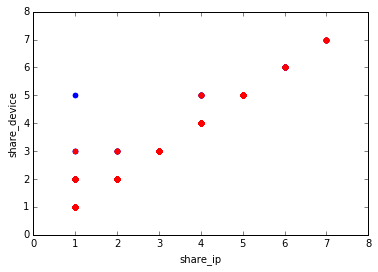

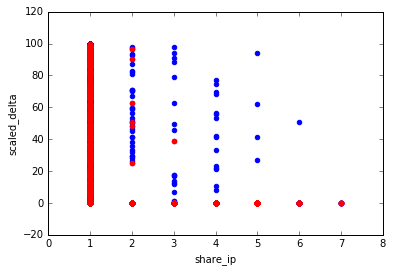

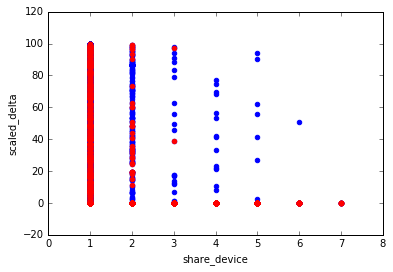

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
dfeatures=['class','share_ip','share_device','scaled_delta']
def drawXY(df,dfeatures):
    n=len(df)
    X=df[dfeatures[1]]
    Y=df[dfeatures[2]]
    rind = np.nonzero(df[dfeatures[0]])[0]
    plt.scatter(X,Y,color='blue')
    plt.scatter(X[rind],Y[rind],color='red') # if fraud, label red
    plt.xlabel(dfeatures[1])
    plt.ylabel(dfeatures[2])
    plt.show()

drawXY(df_cleaned,dfeatures)
dfeatures1=['class','share_ip','scaled_delta']
drawXY(df_cleaned,dfeatures1)
dfeatures2=['class','share_device','scaled_delta']
drawXY(df_cleaned,dfeatures2)

Classifier Selection: 
---------------------


In [36]:
df_cleaned.head()

,purchase_value,age,class,delta,share_device,share_ip,sex_F,sex_M,source_Ads,source_Direct,...,country_Switzerland,country_Taiwan; Republic of China (ROC),country_Thailand,country_Turkey,country_Ukraine,country_United Kingdom,country_United States,country_Venezuela,country_Viet Nam,scaled_delta
0,58,26,0,6303902.0,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.806494
1,62,24,1,1.0,5,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
2,49,23,0,6735609.0,1,1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,64.970675
3,47,32,0,8809935.0,1,1,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.979316
4,51,45,0,4714603.0,1,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.476351


In [37]:
labels = df_cleaned['class'].copy(deep=True).astype(int).as_matrix()
features = df_cleaned.drop('class',axis=1).copy(deep=True).as_matrix() 
features_list =list(df_cleaned.columns.values)
print "features:\t", df_cleaned.columns.values
print 'number of features:\t',features.shape


features:	[u'purchase_value' u'age' u'class' u'delta' u'share_device' u'share_ip'
 u'sex_F' u'sex_M' u'source_Ads' u'source_Direct' u'source_SEO'
 u'browser_Chrome' u'browser_FireFox' u'browser_IE' u'browser_Opera'
 u'browser_Safari' u'country_Argentina' u'country_Australia'
 u'country_Austria' u'country_Belgium' u'country_Brazil' u'country_Canada'
 u'country_Chile' u'country_China' u'country_Colombia'
 u'country_Czech Republic' u'country_Denmark' u'country_Egypt'
 u'country_European Union' u'country_Finland' u'country_France'
 u'country_Germany' u'country_Greece' u'country_Hong Kong' u'country_India'
 u'country_Indonesia' u'country_Iran (ISLAMIC Republic Of)'
 u'country_Ireland' u'country_Israel' u'country_Italy' u'country_Japan'
 u'country_Korea Republic of' u'country_Mexico' u'country_Morocco'
 u'country_Netherlands' u'country_New Zealand' u'country_Norway'
 u'country_Others' u'country_Pakistan' u'country_Poland'
 u'country_Portugal' u'country_Romania' u'country_Russian Federation'


In [38]:
print features.shape[1]

67


In [39]:
# target_feature = ['share_device','share_ip','scaled_delta']
# df_target_features = df_cleaned[['share_device','share_ip','scaled_delta']]
# features = df_target_features.copy(deep=True).astype(int).as_matrix()

# print 'target feature list :\t', df_target_features.columns.values

**KBest, PCA, and Adaboost**

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def scorer(estimator,features_test,labels_test):
    labels_pred = estimator.predict(features_test)
    pre=precision_score(labels_test,labels_pred)
    rec=recall_score(labels_test,labels_pred)
    if pre > 0.3 and rec > 0.3:
        return f1_score(labels_test,labels_pred) 
    return 0

ada = AdaBoostClassifier()
pca = PCA()
pipe = Pipeline(steps=[('selection',SelectKBest(score_func=f_classif)),('pca',pca),('ada',ada)])
sk_fold =StratifiedShuffleSplit(labels,n_iter=100,test_size=0.2)
param_grid=[{'selection__k':[60,40,20], 'pca__n_components': [10,20],'pca__whiten':[True],'ada__n_estimators':[5,10],'ada__learning_rate':[0.1,0.5,1,1.5,2]}]
ada_clf = GridSearchCV(pipe,param_grid,cv=sk_fold,scoring= scorer)
ada_clf.fit(features,labels)
#ada_y_score =ada_clf.predict_proba(features_test)[:,1]
print "Best parameters set found on estimators:", ada_clf.best_params_
print "Best estimators:",ada_clf.best_estimator_
print "Best score:",ada_clf.best_score_

Best parameters set found on estimators: {'ada__n_estimators': 10, 'pca__n_components': 10, 'ada__learning_rate': 1.5, 'pca__whiten': True, 'selection__k': 60}
Best estimators: Pipeline(steps=[('selection', SelectKBest(k=60, score_func=<function f_classif at 0x1239a46e0>)), ('pca', PCA(copy=True, n_components=10, whiten=True)), ('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.5, n_estimators=10, random_state=None))])
Best score: 0.714497909265


**Validation of the model**


In [42]:
from sklearn.metrics import classification_report
import sys
f1_avg=[]
recall_avg=[]
precision_avg=[]
# Enumerate through the cross-validation splits to get an index i for a timer
n_iter = 100 # be consistent with the previous estimator
for i, all_index in enumerate(sk_fold):
    train_index = all_index[0]
    test_index = all_index[1]
    
    features_train,features_test = features[train_index],features[test_index]
    labels_train,labels_test = labels[train_index],labels[test_index]
    
    ada_clf.best_estimator_.fit(features_train,labels_train)
    # use the best estimator trained earlier to fit
    labels_pred = ada_clf.predict(features_test)
    # Each time i is divisible by 10, print the 10% to console.
    if i % round(n_iter/10)==0:
        sys.stdout.write('{0}%..'.format(float(i)/n_iter*100))
        sys.stdout.flush()
    f1_avg.append(f1_score(labels_test,labels_pred))
    precision_avg.append(precision_score(labels_test,labels_pred))
    recall_avg.append(recall_score(labels_test,labels_pred))

print 'Done@'
print ''
print 'F1 Avg:', sum(f1_avg)/n_iter
print 'Precision Avg:', sum(precision_avg)/n_iter
print 'Recall Avg:', sum(recall_avg)/n_iter

#y_true = labels_test
#y_pred = ada_clf.predict(features_test)
#target_names = ['no_fraud','fraud']
#print classification_report(y_true,y_pred,target_names=target_names)
#print 'F1 value',ada_clf.score(features_test,labels_test)
#print 'ada_label_pred=',len(ada_clf.predict(features_test))

0.0%..10.0%..20.0%..30.0%..40.0%..50.0%..60.0%..70.0%..80.0%..90.0%..Done@

F1 Avg: 0.711010027547
Precision Avg: 0.991669892985
Recall Avg: 0.554518716578


In [ ]:
# #Precision of Adaboost
# from sklearn.metrics import precision_score
# ada_label_pred=ada_clf.fit(features_train,labels_train).predict(features_test)
# ada_precision= precision_score(labels_test,ada_label_pred)
# print 'ada_precision is:',ada_precision
# #Recall of Adaboost
# from sklearn.metrics import recall_score
# ada_recall=recall_score(labels_test,ada_label_pred)
# print 'ada_recall is:',ada_recall

**ROC curve**

In [43]:
ada_y_score =ada_clf.predict_proba(features_test)[:,1]

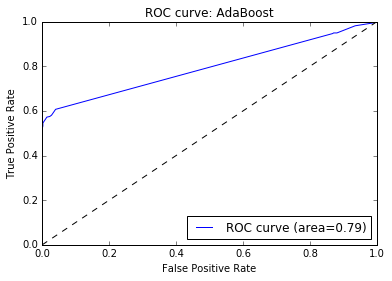

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.cross_validation import train_test_split
# shuffle and split training and test sets
#features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2,random_state=0)
#learn to predict each class against the other
#ada_clf= AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,learning_rate=0.1, n_estimators=5, random_state=None)
#ada_y_score=ada_clf_best_estimator_.fit(features_train,labels_train).predict_proba(features_test)[:,1]
#print features_test.shape
#print ada_y_score.shape
#print ada_clf.fit(features_train,labels_train).predict_proba(features_test)
#compute ROC curve and ROC area
ada_fpr,ada_tpr,ada_thresholds=roc_curve(labels_test,ada_y_score)
ada_roc_auc=auc(ada_fpr,ada_tpr)
#plot of a ROC curve for a specific class
plt.figure()
plt.plot(ada_fpr,ada_tpr,label='ROC curve (area=%0.2f)'%ada_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: AdaBoost')
plt.legend(loc='lower right')
plt.show()

**Adaboost: Accuray, Precision, and Recall**

In [ ]:
# #Accuracy of AdaBoost
# ada_accu=ada_clf.score(features_test,labels_test)
# print 'ada_accuracy is:',ada_accu
# #Precision of Adaboost
# from sklearn.metrics import precision_score
# ada_label_pred=ada_clf_best_estimator_.fit(features_train,labels_train).predict(features_test)
# ada_precision= precision_score(labels_test,ada_label_pred)
# print 'ada_precision is:',ada_precision
# #Recall of Adaboost
# from sklearn.metrics import recall_score
# ada_recall=recall_score(labels_test,ada_label_pred)
# print 'ada_recall is:',ada_recall

**KBest Selector + PCA + RandomRorest**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def scorer(estimator,features_test,labels_test):
    labels_pred = estimator.predict(features_test)
    pre=precision_score(labels_test,labels_pred)
    rec=recall_score(labels_test,labels_pred)
    if pre > 0.3 and rec > 0.3:
        return f1_score(labels_test,labels_pred) 
    return 0

rf = RandomForestClassifier()
pca = PCA()
pipe = Pipeline(steps=[('selection',SelectKBest(score_func=f_classif)),('pca',pca),('rf',rf)])
sk_fold =StratifiedShuffleSplit(labels,n_iter=100,test_size=0.2)
param_grid=[{'selection__k':[60,40,20], 'pca__n_components': [10,20],'pca__whiten':[True],'rf__n_estimators':[10,20,30],'rf__criterion':['gini']}]
rf_clf = GridSearchCV(pipe,param_grid,cv=sk_fold,scoring= scorer)
rf_clf.fit(features,labels)
#rf_y_score =rf_clf.predict_proba(features_test)[:,1]
print "Best parameters set found on estimators:", rf_clf.best_params_
print "Best estimators:",rf_clf.best_estimator_
print "Best score:",rf_clf.best_score_

Best parameters set found on estimators: {'rf__n_estimators': 20, 'pca__n_components': 10, 'selection__k': 60, 'rf__criterion': 'gini', 'pca__whiten': True}
Best estimators: Pipeline(steps=[('selection', SelectKBest(k=60, score_func=<function f_classif at 0x1239a46e0>)), ('pca', PCA(copy=True, n_components=10, whiten=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
   ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
Best score: 0.750881758851


**validation of the model**

In [46]:
from sklearn.metrics import classification_report
import sys
f1_avg=[]
recall_avg=[]
precision_avg=[]
# Enumerate through the cross-validation splits to get an index i for a timer
n_iter = 100 # be consistent with the previous estimator
for i, all_index in enumerate(sk_fold):
    train_index = all_index[0]
    test_index = all_index[1]
    
    features_train,features_test = features[train_index],features[test_index]
    labels_train,labels_test = labels[train_index],labels[test_index]
    
    rf_clf.best_estimator_.fit(features_train,labels_train)
    # use the best estimator trained earlier to fit
    labels_pred = rf_clf.predict(features_test)
    # Each time i is divisible by 10, print the 10% to console.
    if i % round(n_iter/10)==0:
        sys.stdout.write('{0}%..'.format(float(i)/n_iter*100))
        sys.stdout.flush()
    f1_avg.append(f1_score(labels_test,labels_pred))
    precision_avg.append(precision_score(labels_test,labels_pred))
    recall_avg.append(recall_score(labels_test,labels_pred))

print 'Done@'
print ''
print 'F1 Avg:', sum(f1_avg)/n_iter
print 'Precision Avg:', sum(precision_avg)/n_iter
print 'Recall Avg:', sum(recall_avg)/n_iter


0.0%..10.0%..20.0%..30.0%..40.0%..50.0%..60.0%..70.0%..80.0%..90.0%..Done@

F1 Avg: 0.751670341743
Precision Avg: 0.978597978439
Recall Avg: 0.610721925134


**ROC curve**

In [49]:
rf_y_score =rf_clf.predict_proba(features_test)[:,1]

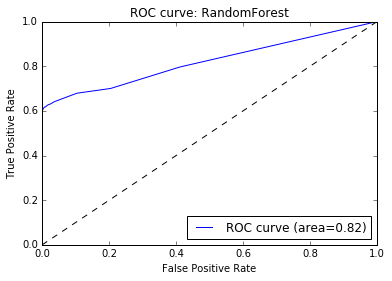

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.cross_validation import train_test_split
# shuffle and split training and test sets
#features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2,random_state=0)
#learn to predict each class against the other
#rf_clf= RandomForestClassifier(n_estimators=100)
#rf_y_score=rf_clf_best_estimator_.fit(features_train,labels_train).predict_proba(features_test)[:,1]
#print features_test.shape
#print ada_y_score.shape
#print ada_clf.fit(features_train,labels_train).predict_proba(features_test)
#compute ROC curve and ROC area
rf_fpr,rf_tpr,rf_thresholds=roc_curve(labels_test,rf_y_score)
rf_roc_auc=auc(rf_fpr,rf_tpr)
#plot of a ROC curve for a specific class
plt.figure()
plt.plot(rf_fpr,rf_tpr,label='ROC curve (area=%0.2f)'%rf_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: RandomForest')
plt.legend(loc='lower right')
plt.show()

Conclusion
----------
In this exericse, I chose to use the combination of KBest, PCA, and Ramdom Forest as my estimator. This combination offers the best Fscore, recall, precsion, and accuracy. One thing to note, this is a **high-demensional categorial** data, and using a feature transformations with ensembles of trees might be a better apporach. (http://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html)



In [ ]:
# # decision tree and feature importances
# from sklearn.tree import DecisionTreeClassifier
# def SelectImportances(features,labels):
#     clf = DecisionTreeClassifier(random_state=0)
#     clf = clf.fit(features,labels)
#     importances = clf.feature_importances_
#     imp=zip(features_list,importances)
#     imps=sorted(imp,key=lambda x: x[1],reverse=True)
#     return imps

# SelectImportances(features,labels)

In [ ]:

# # feature_importances with forests of trees
# from sklearn.ensemble import ExtraTreesClassifier

# def SelectImportances2(features,labels):
#     forest = ExtraTreesClassifier(n_estimators = 50,random_state=0)
#     forest = forest.fit(features,labels)
#     importances = forest.feature_importances_
#     imp=zip(features_list,importances)
#     imps=sorted(imp,key=lambda x: x[1],reverse=True)
    
#     std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
#     indices = np.argsort(importances)[::-1] # reverse sort, decending    
#     # Print the feature ranking
#     print "Feature ranking:"
#     for f in range(features.shape[1]):
#         print "%d. feature %d(%f)" % (f+1, indices[f], importances[indices[f]])
#     #plot the feature importances of the forest
#     plt.figure()
#     plt.title("Feature importances")
#     plt.bar(range(features.shape[1]),importances[indices],color='r',yerr=std[indices],align='center')
#     plt.xticks(range(features.shape[1]),indices)
#     plt.xlim([-1,features.shape[1]])
#     plt.show()
#     return imps
# SelectImportances2(features,labels)